# 1. Imports

In [41]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

# 2. Help Functions | Settings

## 2.1 Settings

<AxesSubplot:>

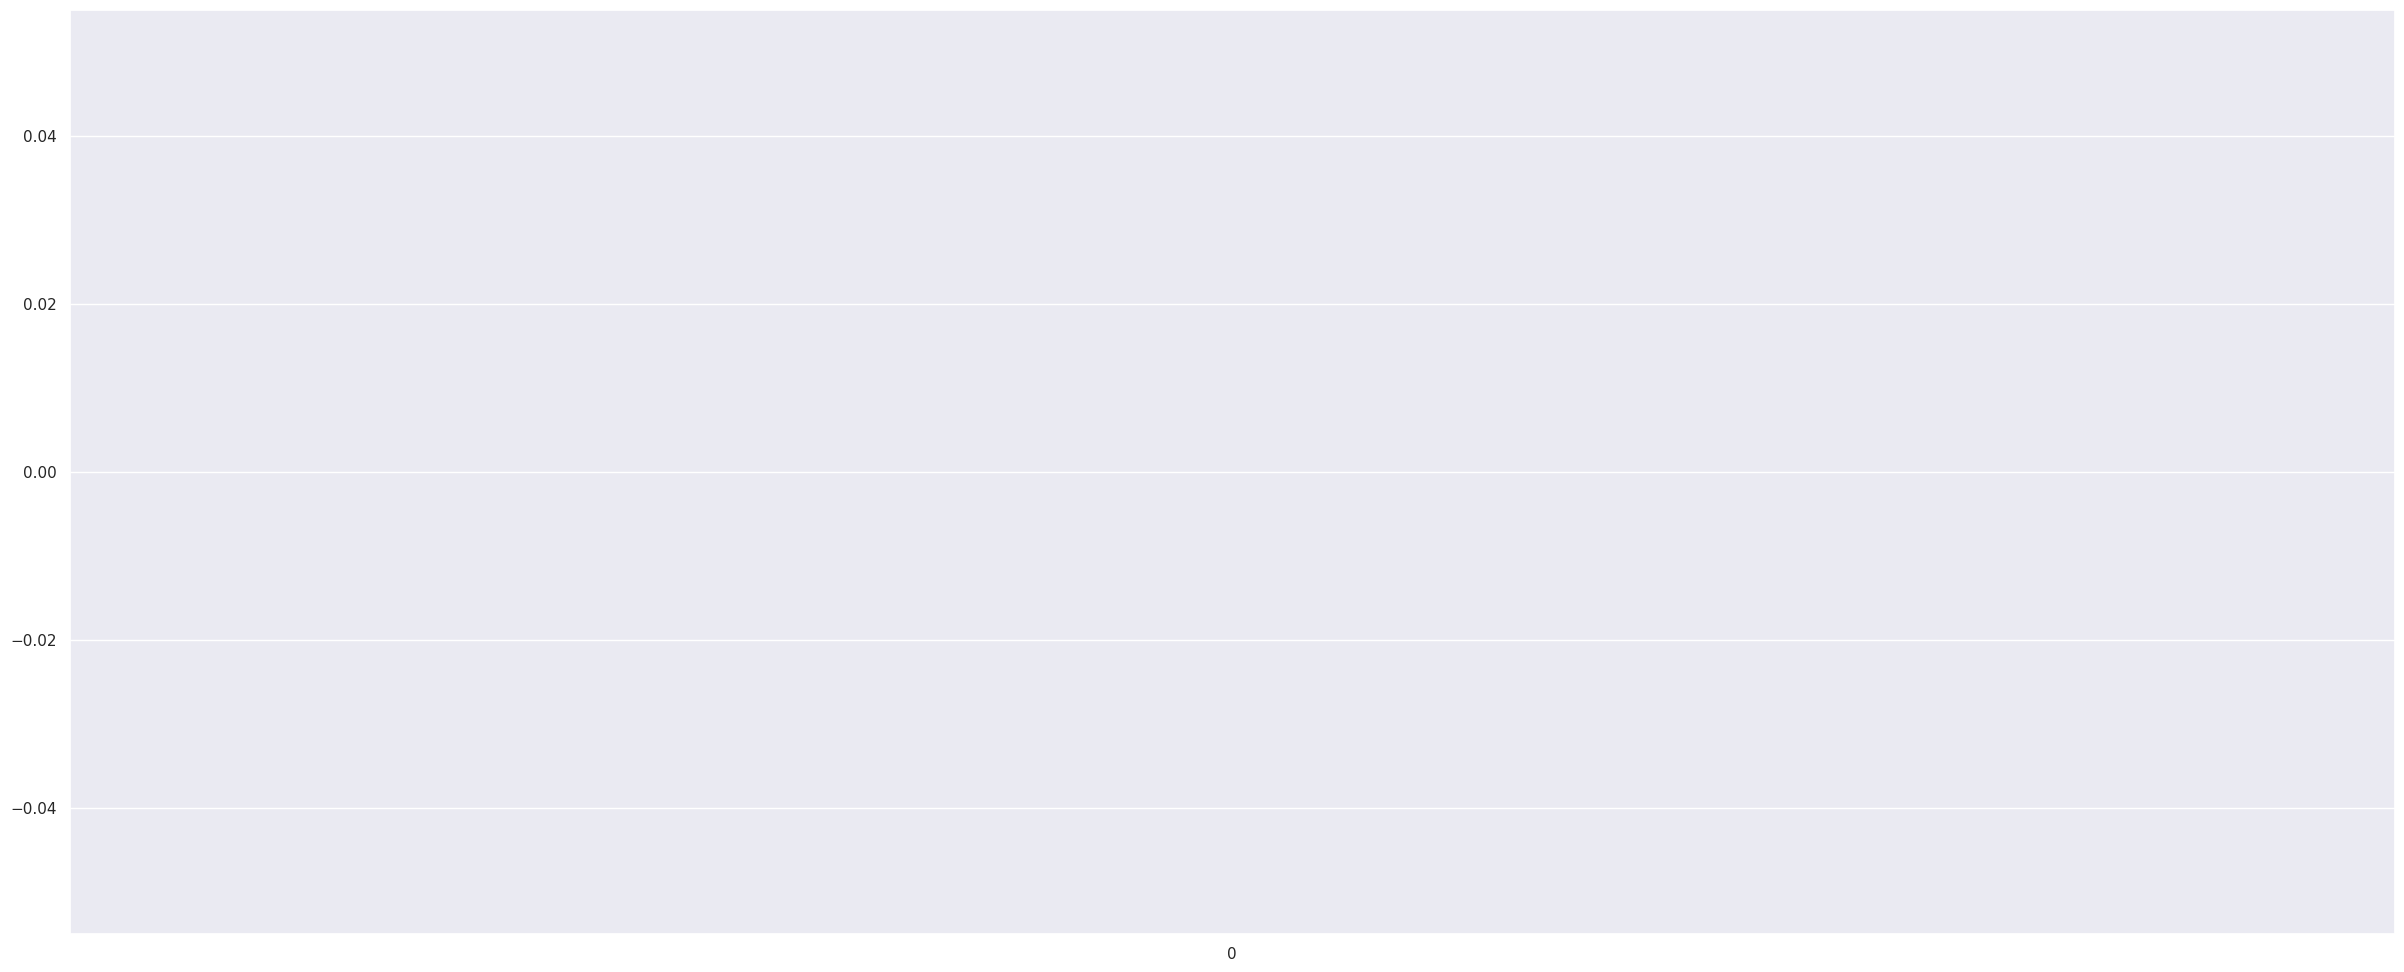

In [5]:
sns.set( rc={'figure.figsize' : (30,12)} )
sns.barplot()

# 3. Data Load

In [28]:
data_raw = pd.read_csv( '../data/ab_testing.csv' )

## 3.1 Initial conversions

In [29]:
data_raw.date = pd.to_datetime( data_raw.date, format = "%Y-%m-%d" )

# 4. EDA

## 4.1 Initial exploration

In [26]:
data_raw.dtypes

uid                   int64
country              object
gender               object
spent                 int64
purchases             int64
date         datetime64[ns]
group                object
device               object
dtype: object

In [44]:
display( data_raw.head(5) )
display( data_raw.describe().T )
display( data_raw[['country','gender','group', 'device']].describe().T )
display( f'Testes iniciados {data_raw.date.min().strftime( "%d/%m/%Y" )} e findados {data_raw.date.max().strftime( "%d/%m/%Y" )}' )

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


,count,mean,std,min,25%,50%,75%,max
uid,45883.0,5.544232e+07,2.558679e+07,11115722.0,33395751.5,55312026.0,77535569.0,99999383.0
spent,45883.0,1.883453e+03,1.363922e+03,99.0,897.0,1596.0,2593.0,12170.0
purchases,45883.0,4.544385e+00,3.102454e+00,1.0,2.0,4.0,6.0,30.0


,count,unique,top,freq
country,45883,10,USA,13998
gender,45883,2,M,23116
group,45883,2,GRP A,23009
device,45883,2,A,22982


'Testes iniciados 30/01/2014 e findados 26/01/2018'